In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('F:\\Cyprus\\CSV-01-12\\01-12\\Portmap.csv')

c:\users\charan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [4]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


In [5]:
ack = df[' ACK Flag Count']
pd.unique(ack)

array([0, 1], dtype=int64)

In [6]:
init = df['Init_Win_bytes_forward']
pd.unique(init)

array([   -1,   257,   253,   255,   242,   258,   256,   527,  1444,
         695,   291,   130,   132,   318,   248,  1024,  8192,  1163,
         252,   829,  1329,   739,  2031,     0,   119, 29200,   259,
         247,   246, 16324, 16343,   123, 16560, 16425,   238,  1825,
        1892,  1959,   237, 16098,    60,   250, 16384, 63948, 31320,
       63919, 31768, 65535, 16152, 16383,   254,   251,   245,   290,
         140,   129,   210,   139, 16401, 16228,   288, 16439, 16465,
       16318, 16471, 16362,   310, 16321, 16441, 16257,   268,   262,
         285, 16476,   127,   300,   488, 16389, 63877, 63846, 52560,
       14600,   160,   244,   296,   260, 16393,   227,   304,   125,
          13, 16417, 32120, 62946, 33580, 63668, 16360, 16370,   287,
         395, 16463, 16207,    82,    71, 46485,   298, 16537, 16281,
       16253, 16394, 16548, 16298, 16294, 16421,   269,   263,   349,
         289, 16386,   293, 16488,  1307,   243,   193,   327,   229,
       16404,   373,

In [7]:
seg = df[' min_seg_size_forward'].tolist()
pd.unique(seg)

array([          0,          20,          32,          28,          40,
                44,          24,           8,          14, -1062718972])

In [8]:
iat = df[' Fwd IAT Mean']
pd.unique(iat)


array([2.60129543e+06, 2.07904553e+06, 7.28709460e+06, ...,
       6.42857143e+00, 9.70000000e+01, 1.87000000e+02])

In [9]:
flow = df[' Fwd IAT Max']
pd.unique(flow)


array([1.0001143e+07, 9.9781300e+06, 3.6373056e+07, ..., 1.4700000e+02,
       9.7000000e+01, 1.8700000e+02])

In [11]:
flow = df['Fwd IAT Total']
pd.unique(flow)

array([1.14456999e+08, 1.14347504e+08, 3.64354730e+07, ...,
       1.05000000e+02, 1.47000000e+02, 1.87000000e+02])

In [13]:
flow = df[' Flow Duration']
pd.unique(flow)

array([114456999, 114347504,  36435473, ...,      4677,     48599,
             392], dtype=int64)

In [16]:
flow = df[' Subflow Fwd Bytes']
pd.unique(flow)

array([     0,    116,     12,   1500,    123,    154,    102,     31,
           24,     48,     62,     74,   2918,     68,     64,   2728,
            6,   2646,    900,     18,     94,     76,     90,   2522,
         5242,   2520,     88,   3796,   1747,   1960,     54,     66,
           82,     84,     70,     37,   2265,     78,     86,     92,
         4134,    100,  16508,   4008,     58,   8330,   5832,   1906,
           50,   1034,    104,   1678,   1344,    822,   2572,   2938,
         1934,   1928,     72,    674,   1616,   1726,   2722,   1712,
         3674,   2802,  40560,   1681,   1918,   5364,  11036,  23386,
          130,    874,   3870,    812,   4998,     60,  10460,   3890,
         6971,   6861,   6873,   7089,   6843,   4189,     80,   2433,
         1669,   3072,   1042,   2232,    804,   2952,     96,  22092,
          664,    233,    129,   2750,    666,    160,    132,   4200,
         2670,  10166,   2678,    128,   2732,   1706,   1972,   1772,
      

In [17]:
flow = df[' Max Packet Length']
pd.unique(flow)

array([   0.,   46.,    6.,  300.,   39.,   31.,   24.,   35.,  976.,
         50.,  102., 2733.,   37., 2920.,  103.,   93.,   94.,   61.,
       1430.,   60.,  107., 1986., 3446.,   67.,  136.,   47.,   43.,
        307.,  281.,   79.,   69.,   97.,   83.,   73.,   51.,   38.,
       2942.,   55.,  100.,   63.,   90.,  112.,   66.,   57.,   59.,
         62.,  104.,  127.,   72.,   86., 2635.,   78.,   48., 2315.,
       2860.,   58.,   70.,   85., 2525.,  311.,  297.,   41.,  159.,
        705.,  255.,   52.,  200.,  384.,   71.,   87.,   95.,  402.,
        198., 1554.,  178., 1571.,  132.,  788., 1452., 1492., 2317.,
       1460., 2643.,  123.,   91., 2266.,  806., 2523., 2103.,  146.,
       3047.,  111., 2956.,   56.,  101.,  271., 2526.,  177., 1906.,
        125.,  201., 2409.,  305.,  205.,  155.,  176., 1719., 1017.,
       1418.,  393.,  323.,  163.,  131., 2108.,  522., 2314.,   49.,
         96.,   88.,   92.,   75.,   99.,   80.,  109.,  108.,   89.,
       1918.,  175.,

In [18]:
label = df[' Label']
pd.unique(label)


array(['BENIGN', 'Portmap'], dtype=object)

In [19]:
df[' Label'].value_counts()[0]

186960

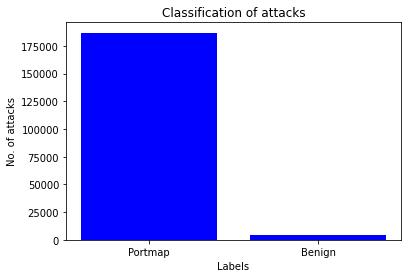

In [20]:
data = {'Portmap':df[' Label'].value_counts()[0], 'Benign':df[' Label'].value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='blue')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [23]:
data = [df[" ACK Flag Count"], df["Init_Win_bytes_forward"],df[" min_seg_size_forward"], df[" Fwd IAT Mean"],df[" Fwd IAT Max"],df['Fwd IAT Total'],df[' Flow Duration'],df[' Subflow Fwd Bytes'],df[' Max Packet Length'], df[" Label"]]

In [24]:
headers = ["ack", "init","seg","iatmean","iatmax","iattotal","flow","subflow","maxpack","label"]

In [25]:
df1 = pd.concat(data, axis=1, keys=headers)

In [26]:
df1

,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack,label
0,0,-1,0,2.601295e+06,10001143.0,114456999.0,114456999,0,0.0,BENIGN
1,0,-1,0,2.079046e+06,9978130.0,114347504.0,114347504,0,0.0,BENIGN
2,0,257,20,7.287095e+06,36373056.0,36435473.0,36435473,116,46.0,BENIGN
3,0,253,20,7.286941e+06,36372291.0,36434705.0,36434705,116,46.0,BENIGN
4,0,257,20,7.286925e+06,36372216.0,36434626.0,36434626,116,46.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...
191689,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,Portmap
191690,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,Portmap
191691,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,Portmap
191692,0,-1,20,4.900000e+01,49.0,49.0,49,458,229.0,Portmap


In [27]:
df1.to_csv("portmap_attributes.csv")


## Model Creation

In [28]:
df1=pd.read_csv('portmap_attributes.csv')

In [29]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [30]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [31]:
pd.unique(df1['label'])
# 1 = Portmap
# 0 = Benign

array([0, 1])

In [32]:
df1

,Unnamed: 0,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack,label
0,0,0,-1,0,2.601295e+06,10001143.0,114456999.0,114456999,0,0.0,0
1,1,0,-1,0,2.079046e+06,9978130.0,114347504.0,114347504,0,0.0,0
2,2,0,257,20,7.287095e+06,36373056.0,36435473.0,36435473,116,46.0,0
3,3,0,253,20,7.286941e+06,36372291.0,36434705.0,36434705,116,46.0,0
4,4,0,257,20,7.286925e+06,36372216.0,36434626.0,36434626,116,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...
191689,191689,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,1
191690,191690,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,1
191691,191691,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0,1
191692,191692,0,-1,20,4.900000e+01,49.0,49.0,49,458,229.0,1


In [33]:
# sample 10000 points from majority class to create new dataset
df_maj = df1[df1['label']==1]
df_min = df1[df1['label']==0]
df_maj = df_maj.sample(n=10000)
df_maj = pd.concat([df_maj,df_min], axis=0)


In [34]:
len(df_maj)

14734

In [35]:
X = df_maj.drop('label',axis=1)
y = df_maj['label']

In [36]:
X

,Unnamed: 0,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
46238,46238,0,-1,8,1.0,1.0,1.0,1,494,247.0
81601,81601,0,-1,20,1.0,1.0,1.0,1,458,229.0
44441,44441,0,-1,8,1.0,1.0,1.0,1,458,229.0
66776,66776,0,-1,20,48.0,48.0,48.0,48,458,229.0
90494,90494,0,-1,20,1.0,1.0,1.0,1,458,229.0
...,...,...,...,...,...,...,...,...,...,...
135723,135723,0,-1,20,2.0,2.0,2.0,20845,78,146.0
135898,135898,0,-1,20,1.0,1.0,1.0,21026,94,111.0
136428,136428,0,16387,20,1.0,1.0,1.0,1,37,31.0
136703,136703,0,119,20,1.0,1.0,2.0,2,18,6.0


In [37]:
X['init'].value_counts()

-1        11880
 8192       753
 29200      163
 256        154
 258         77
 255         76
 246         76
 254         71
 257         67
 1825        52
 16425       51
 253         43
 1892        41
 237         38
 250         38
 16439       29
 119         29
 238         27
 245         23
 242         23
 123         22
 252         22
 16471       21
 16319       20
 16537       19
 0           19
 1959        18
 16560       17
 16421       17
 60          16
 305         13
 251         13
 122         11
 247         11
 244         10
 16324        9
 288          9
 248          9
 16360        9
 118          9
 1444         8
 140          8
 329          8
 16364        7
 12           7
 71           7
 235          7
 264          7
 318          7
 362          6
 126          6
 16383        6
 4353         6
 80           6
 285          6
 1024         6
 16525        6
 16318        6
 16497        6
 243          6
 31           6
 16542        5
 16253  

In [38]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [39]:
y_test.value_counts()

1    1984
0     963
Name: label, dtype: int64

In [40]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [41]:
y_train.value_counts()

1    8016
0    8016
Name: label, dtype: int64

In [42]:
x_train

,Unnamed: 0,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
0,107287,0,-1,8,2.000000e+00,2.000000e+00,2.000000e+00,2,458,229.000000
1,83701,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
2,135128,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
3,89970,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
4,58783,0,-1,8,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
...,...,...,...,...,...,...,...,...,...,...
16027,6034,0,255,20,0.000000e+00,0.000000e+00,0.000000e+00,54870,6,6.000000
16028,1845,0,-1,20,1.776499e+00,1.776499e+00,1.776499e+00,20643,58,92.834031
16029,695,0,16443,20,0.000000e+00,0.000000e+00,0.000000e+00,40787,6,6.000000
16030,4859,0,3460,20,2.395246e+06,5.890100e+07,1.192327e+08,119232670,8562,1194.576924


In [43]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

In [44]:
#train_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
# test_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [45]:
train_dataset

,Unnamed: 0,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack,label
0,107287,0,-1,8,2.000000e+00,2.000000e+00,2.000000e+00,2,458,229.000000,1
1,83701,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000,1
2,135128,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000,1
3,89970,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000,1
4,58783,0,-1,8,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
16027,6034,0,255,20,0.000000e+00,0.000000e+00,0.000000e+00,54870,6,6.000000,0
16028,1845,0,-1,20,1.776499e+00,1.776499e+00,1.776499e+00,20643,58,92.834031,0
16029,695,0,16443,20,0.000000e+00,0.000000e+00,0.000000e+00,40787,6,6.000000,0
16030,4859,0,3460,20,2.395246e+06,5.890100e+07,1.192327e+08,119232670,8562,1194.576924,0


In [46]:
test_dataset

,Unnamed: 0,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack,label
66361,66361,0,-1,20,1.000000,1.0,1.0,1,458,229.0,1
117948,117948,0,-1,-1062718972,1.000000,1.0,1.0,1,494,247.0,1
1115,1115,0,16386,20,1.000000,1.0,1.0,1,12,6.0,0
81824,81824,0,-1,20,1.000000,1.0,1.0,1,458,229.0,1
733,733,0,-1,40,3.000000,3.0,3.0,46614,90,177.0,0
...,...,...,...,...,...,...,...,...,...,...,...
60589,60589,0,-1,8,1.000000,1.0,1.0,1,458,229.0,1
128262,128262,0,-1,8,1.000000,1.0,1.0,1,458,229.0,1
36000,36000,0,-1,8,1.000000,1.0,1.0,1,458,229.0,1
1193,1193,0,256,20,89.333333,265.0,268.0,268,129,46.0,0


In [47]:
len(train_dataset['init'].value_counts())

1067

In [48]:
# pycaret init
exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16032, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [49]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,0.9997,0.9975,1.0000,0.9988,0.9975,0.9975
1,0.9981,0.9998,0.9963,1.0000,0.9981,0.9963,0.9963
2,0.9988,0.9994,0.9975,1.0000,0.9988,0.9975,0.9975
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9988,1.0000,0.9975,1.0000,0.9988,0.9975,0.9975
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
8,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
9,0.9975,1.0000,0.9950,1.0000,0.9975,0.9950,0.9950


In [50]:
tuned_xgb = tune_model(xgb_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9981,0.9999,0.9975,0.9988,0.9981,0.9963,0.9963
1,0.9975,0.9997,0.9963,0.9988,0.9975,0.9950,0.9950
2,0.9981,0.9995,0.9963,1.0000,0.9981,0.9963,0.9963
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
6,0.9994,1.0000,1.0000,0.9988,0.9994,0.9988,0.9988
7,0.9994,0.9998,0.9988,1.0000,0.9994,0.9988,0.9988
8,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
9,0.9981,1.0000,0.9963,1.0000,0.9981,0.9963,0.9963


In [49]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.9982,0.9838,0.9987,0.9912,0.9826,0.9827
1,0.9894,0.9981,0.9826,0.9962,0.9894,0.9789,0.9789
2,0.9932,0.9996,0.9888,0.9975,0.9931,0.9863,0.9864
3,0.9900,0.9991,0.9863,0.9937,0.9900,0.9801,0.9801
4,0.9913,0.9985,0.9863,0.9962,0.9912,0.9826,0.9826
5,0.9938,0.9996,0.9888,0.9987,0.9938,0.9876,0.9876
6,0.9894,0.9995,0.9801,0.9987,0.9893,0.9788,0.9790
7,0.9900,0.9992,0.9801,1.0000,0.9899,0.9801,0.9803
8,0.9900,0.9982,0.9801,1.0000,0.9899,0.9801,0.9803
9,0.9888,0.9996,0.9788,0.9987,0.9887,0.9776,0.9778


In [50]:
tuned_ada = tune_model(ada_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9900,0.9982,0.9813,0.9987,0.9900,0.9801,0.9802
1,0.9876,0.9989,0.9826,0.9925,0.9875,0.9751,0.9752
2,0.9925,0.9993,0.9888,0.9962,0.9925,0.9851,0.9851
3,0.9907,0.9990,0.9863,0.9950,0.9906,0.9813,0.9814
4,0.9932,0.9986,0.9863,1.0000,0.9931,0.9863,0.9864
5,0.9932,0.9996,0.9876,0.9987,0.9931,0.9863,0.9864
6,0.9888,0.9994,0.9789,0.9987,0.9887,0.9776,0.9778
7,0.9894,0.9991,0.9788,1.0000,0.9893,0.9788,0.9791
8,0.9888,0.9980,0.9776,1.0000,0.9887,0.9776,0.9778
9,0.9888,0.9996,0.9788,0.9987,0.9887,0.9776,0.9778


In [51]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9972,0.9913,0.9938,0.9925,0.9851,0.9851
1,0.9876,0.9971,0.9900,0.9851,0.9876,0.9751,0.9751
2,0.9944,0.9998,0.9938,0.9950,0.9944,0.9888,0.9888
3,0.9932,0.9972,0.9913,0.9950,0.9931,0.9863,0.9863
4,0.9950,0.9985,0.9900,1.0000,0.9950,0.9900,0.9901
5,0.9956,0.9980,0.9913,1.0000,0.9956,0.9913,0.9913
6,0.9944,0.9961,0.9900,0.9987,0.9944,0.9888,0.9888
7,0.9938,0.9980,0.9875,1.0000,0.9937,0.9876,0.9876
8,0.9932,0.9960,0.9863,1.0000,0.9931,0.9863,0.9864
9,0.9950,0.9987,0.9913,0.9987,0.9950,0.9900,0.9901


In [52]:
tuned_rf = tune_model(rf_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9907,0.9975,0.9813,1.0000,0.9906,0.9813,0.9815
1,0.9888,0.9985,0.9801,0.9975,0.9887,0.9776,0.9778
2,0.9925,0.9994,0.9863,0.9987,0.9925,0.9851,0.9852
3,0.9925,0.9984,0.9851,1.0000,0.9925,0.9851,0.9852
4,0.9925,0.9986,0.9851,1.0000,0.9925,0.9851,0.9852
5,0.9938,0.9997,0.9876,1.0000,0.9937,0.9876,0.9876
6,0.9894,0.9989,0.9801,0.9987,0.9893,0.9788,0.9790
7,0.9894,0.9988,0.9788,1.0000,0.9893,0.9788,0.9791
8,0.9876,0.9969,0.9751,1.0000,0.9874,0.9751,0.9754
9,0.9888,0.9992,0.9776,1.0000,0.9887,0.9776,0.9778


In [53]:
lgbm_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.9989,0.9900,0.9925,0.9913,0.9826,0.9826
1,0.9925,0.9995,0.9900,0.9950,0.9925,0.9851,0.9851
2,0.9907,0.9994,0.9925,0.9888,0.9907,0.9813,0.9814
3,0.9932,0.9995,0.9888,0.9975,0.9931,0.9863,0.9864
4,0.9919,0.9995,0.9863,0.9975,0.9919,0.9838,0.9839
5,0.9950,0.9999,0.9900,1.0000,0.9950,0.9900,0.9901
6,0.9932,0.9998,0.9863,1.0000,0.9931,0.9863,0.9864
7,0.9944,0.9995,0.9888,1.0000,0.9944,0.9888,0.9889
8,0.9913,0.9991,0.9826,1.0000,0.9912,0.9826,0.9827
9,0.9938,0.9999,0.9875,1.0000,0.9937,0.9876,0.9876


In [54]:
tuned_lgbm = tune_model(lgbm_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9907,0.9985,0.9863,0.9950,0.9906,0.9813,0.9814
1,0.9919,0.9993,0.9876,0.9962,0.9919,0.9838,0.9839
2,0.9938,0.9995,0.9900,0.9975,0.9938,0.9876,0.9876
3,0.9944,0.9995,0.9888,1.0000,0.9944,0.9888,0.9889
4,0.9932,0.9994,0.9863,1.0000,0.9931,0.9863,0.9864
5,0.9950,0.9999,0.9900,1.0000,0.9950,0.9900,0.9901
6,0.9925,0.9996,0.9851,1.0000,0.9925,0.9851,0.9852
7,0.9913,0.9996,0.9826,1.0000,0.9912,0.9826,0.9827
8,0.9900,0.9991,0.9813,0.9987,0.9899,0.9801,0.9802
9,0.9938,0.9999,0.9875,1.0000,0.9937,0.9876,0.9876


In [55]:
lr_model=create_model('lr') #JUST TO CHECK IF ITS SHOWING GOOD RESULTS FOR ALL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6269,0.8754,0.9963,0.5730,0.7275,0.2537,0.3765
1,0.9248,0.9614,0.8831,0.9634,0.9215,0.8495,0.8525
2,0.9453,0.9701,0.9179,0.9711,0.9437,0.8905,0.8919
3,0.6343,0.8676,1.0000,0.5776,0.7322,0.2687,0.3939
4,0.9384,0.9755,0.8955,0.9796,0.9357,0.8768,0.8800
5,0.6341,0.8806,0.9988,0.5777,0.7320,0.2679,0.3917
6,0.9415,0.9756,0.9005,0.9810,0.9390,0.8830,0.8860
7,0.6385,0.8708,1.0000,0.5802,0.7343,0.2772,0.4012
8,0.6497,0.8714,0.9963,0.5882,0.7397,0.2996,0.4155
9,0.6441,0.8825,1.0000,0.5840,0.7374,0.2884,0.4105


## Manual training

In [51]:
x_test.drop(['Unnamed: 0'],axis=1,inplace=True)
x_train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [52]:
x_test

,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
66361,0,-1,20,1.000000,1.0,1.0,1,458,229.0
117948,0,-1,-1062718972,1.000000,1.0,1.0,1,494,247.0
1115,0,16386,20,1.000000,1.0,1.0,1,12,6.0
81824,0,-1,20,1.000000,1.0,1.0,1,458,229.0
733,0,-1,40,3.000000,3.0,3.0,46614,90,177.0
...,...,...,...,...,...,...,...,...,...
60589,0,-1,8,1.000000,1.0,1.0,1,458,229.0
128262,0,-1,8,1.000000,1.0,1.0,1,458,229.0
36000,0,-1,8,1.000000,1.0,1.0,1,458,229.0
1193,0,256,20,89.333333,265.0,268.0,268,129,46.0


In [53]:
x_train

,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
0,0,-1,8,2.000000e+00,2.000000e+00,2.000000e+00,2,458,229.000000
1,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
2,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
3,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
4,0,-1,8,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
...,...,...,...,...,...,...,...,...,...
16027,0,255,20,0.000000e+00,0.000000e+00,0.000000e+00,54870,6,6.000000
16028,0,-1,20,1.776499e+00,1.776499e+00,1.776499e+00,20643,58,92.834031
16029,0,16443,20,0.000000e+00,0.000000e+00,0.000000e+00,40787,6,6.000000
16030,0,3460,20,2.395246e+06,5.890100e+07,1.192327e+08,119232670,8562,1194.576924


### Training Different Models

In [54]:
xgb = XGBClassifier(scale_pos_weight=1)
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)



In [55]:
x_train

,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
0,0,-1,8,2.000000e+00,2.000000e+00,2.000000e+00,2,458,229.000000
1,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
2,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
3,0,-1,20,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
4,0,-1,8,1.000000e+00,1.000000e+00,1.000000e+00,1,458,229.000000
...,...,...,...,...,...,...,...,...,...
16027,0,255,20,0.000000e+00,0.000000e+00,0.000000e+00,54870,6,6.000000
16028,0,-1,20,1.776499e+00,1.776499e+00,1.776499e+00,20643,58,92.834031
16029,0,16443,20,0.000000e+00,0.000000e+00,0.000000e+00,40787,6,6.000000
16030,0,3460,20,2.395246e+06,5.890100e+07,1.192327e+08,119232670,8562,1194.576924


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [57]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  100.0
xgb roc_auc Score ->  1.0
f1 score -> 1.0


In [58]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
conf_mat_xgb = confusion_matrix(y_test,predictions_xgb)
print(conf_mat_xgb)

[[ 963    0]
 [   0 1984]]


# ADA BOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [63]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       963
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [64]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  99.7624703087886
ada roc_auc Score ->  0.9979686924262219
ada f1 score -> 0.9982336613676508


# RF

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [66]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [67]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  100.0
rf roc_auc Score ->  1.0
rf f1 score -> 1.0


# LGBM

In [68]:
import lightgbm

In [69]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [70]:
print(classification_report(y_test,predictions_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [71]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  100.0
rf roc_auc Score ->  1.0
rf f1 score -> 1.0


# Running on Whole Dataset


In [72]:
whole_df = df1
whole_df
whole_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [73]:
whole_y = whole_df['label']
whole_x = whole_df.drop(['label'],axis=1)

In [74]:
whole_x


,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
0,0,-1,0,2.601295e+06,10001143.0,114456999.0,114456999,0,0.0
1,0,-1,0,2.079046e+06,9978130.0,114347504.0,114347504,0,0.0
2,0,257,20,7.287095e+06,36373056.0,36435473.0,36435473,116,46.0
3,0,253,20,7.286941e+06,36372291.0,36434705.0,36434705,116,46.0
4,0,257,20,7.286925e+06,36372216.0,36434626.0,36434626,116,46.0
...,...,...,...,...,...,...,...,...,...
191689,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191690,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191691,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191692,0,-1,20,4.900000e+01,49.0,49.0,49,458,229.0


In [75]:
whole_x

,ack,init,seg,iatmean,iatmax,iattotal,flow,subflow,maxpack
0,0,-1,0,2.601295e+06,10001143.0,114456999.0,114456999,0,0.0
1,0,-1,0,2.079046e+06,9978130.0,114347504.0,114347504,0,0.0
2,0,257,20,7.287095e+06,36373056.0,36435473.0,36435473,116,46.0
3,0,253,20,7.286941e+06,36372291.0,36434705.0,36434705,116,46.0
4,0,257,20,7.286925e+06,36372216.0,36434626.0,36434626,116,46.0
...,...,...,...,...,...,...,...,...,...
191689,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191690,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191691,0,-1,20,1.000000e+00,1.0,1.0,1,458,229.0
191692,0,-1,20,4.900000e+01,49.0,49.0,49,458,229.0


In [76]:
whole_predict_xgb = xgb_clf.predict(whole_x)

In [77]:
print(classification_report(whole_y,whole_predict_xgb))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_xgb)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4734
           1       1.00      1.00      1.00    186960

    accuracy                           1.00    191694
   macro avg       0.98      1.00      0.99    191694
weighted avg       1.00      1.00      1.00    191694

[[  4734      0]
 [   162 186798]]


In [78]:
whole_predict_ada = ada_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_ada))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_ada)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4734
           1       1.00      1.00      1.00    186960

    accuracy                           1.00    191694
   macro avg       0.94      1.00      0.97    191694
weighted avg       1.00      1.00      1.00    191694

[[  4724     10]
 [   656 186304]]


In [79]:
whole_predict_rf = rf_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_rf))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_rf)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4734
           1       1.00      1.00      1.00    186960

    accuracy                           1.00    191694
   macro avg       0.99      1.00      0.99    191694
weighted avg       1.00      1.00      1.00    191694

[[  4734      0]
 [   141 186819]]


In [80]:
whole_predict_lgbm = lgbm_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_lgbm))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_lgbm)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4734
           1       1.00      1.00      1.00    186960

    accuracy                           1.00    191694
   macro avg       0.99      1.00      0.99    191694
weighted avg       1.00      1.00      1.00    191694

[[  4734      0]
 [   126 186834]]
